## Foundations of Data Science - 2020 - Exercise Sheet 12
### Exercise 12.2 (Play with the Perceptron algorithm)

In [1]:
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [3]:
def vanilla_kernel(data):
    return data @ data.T

def gauss_kernel(data):
    c = 2
    distMatrix = np.linalg.norm((data[:, None, :] - data), axis=2)
    return np.exp(-c * np.power(distMatrix, 2))

def gen_data_i(N):
    data   = np.zeros((N, 2))
    labels = np.zeros(N)
    w = np.array([2,1])
    for i in range(N):
        x = np.random.uniform(-100, 100, 2)
        while abs(np.dot(w, x)) < 1:
            x = np.random.uniform(-100, 100, 2)
        data[i]   = x
        labels[i] = np.sign(np.dot(w, x))
        
    return data, labels

def gen_data_ii(N):
    data   = np.zeros((N, 2))
    labels = np.zeros(N)
    for i in range(N):
        if np.random.random() < 1/3:
            r = np.random.uniform(0.8, 1.2)
            labels[i] = -1
        else:
            r = np.random.uniform(1.6, 2.4)
            labels[i] = 1
        phi = np.random.uniform(0, 2*np.pi)
        data[i] = [r * np.cos(phi), r * np.sin(phi)]
    
    return data, labels

def gen_data_iii(N):
    data   = np.zeros((N, 2))
    labels = np.zeros(N)
    for i in range(N):
        if np.random.random() < 1/3:
            r = np.random.uniform(0.8, 1.2)
            labels[i] = -1
        else:
            r = np.random.uniform(1.6, 2.4)
            labels[i] = 1
        phi = np.random.uniform(0, 2*np.pi)
        data[i] = [1 + r * np.cos(phi), 1 + r * np.sin(phi)]
    
    return data, labels

class Perceptron(object):
    
    def __init__(self, data, kernel):
        self.c = np.zeros(data.shape[0])
        self.K = kernel(data)
        self.steps  = 0
        self.predictions = []
    
    def train(self, labels, track=True):
        self.steps = 0
        self.c = np.zeros(labels.shape)
        self.predictions = []
        stop = False
        
        while( not stop ):
            stop = True
            for i, l in enumerate(labels):
                if (np.dot(self.K[i], self.c) * l <= 0):
                    self.c[i]  += l      # update
                    self.steps += 1      # step counter
                    if track:
                        self.predictions.append(
                            np.where(np.dot(self.K, self.c) > 0, 1, -1))
                    stop = False          # stopping criterion
                    
                    break
        
def eval(data, labels, kernel, data_gen, iterations):
    S = []

    for _ in range(iterations):
        dataLinear, labelsLinear = data_gen(1000)
        p = Perceptron(dataLinear, kernel)
        p.train(labelsLinear, track=False)
        S.append(p.steps)
        
    return S
        
                    
    

#### (i) Pick a vector $w^{*} \in R^2$. Pick 1000 random points $x_i$ uniformly distributed in $[−100,100]^2 ⊂ R^2$ with $|〈w^{*}|x〉| ≥1 $and compute labels $ℓ_i ← sign(〈w^{*}|xi〉)∈\{−1,+1\}$.

In [4]:
dataLinear, labelsLinear = gen_data_i(1000)

# ---------------------------------------------------------------------

print("Initializing Perceptron algorithm, calculate kernel matrix ...")
p = Perceptron(dataLinear, vanilla_kernel)
print("Done.\n", "Training perceptron ...", sep='\n')
p.train(labelsLinear)
print("Done.")
print("\nSteps until convergence:", p.steps)

Initializing Perceptron algorithm, calculate kernel matrix ...
Done.

Training perceptron ...
Done.

Steps until convergence: 22


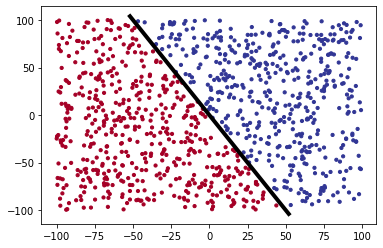

In [5]:
x = dataLinear[:, 0]
y = dataLinear[:, 1]

for l in p.predictions:
    clear_output(wait=True)
    plt.scatter(x, y, c=l, s=10, cmap="RdYlBu")
    plt.plot([-52, 52], [104, -104], 'k-', lw=4)
    plt.show()
    sleep(0.5)

### Bound from the lecture: $r² \cdot |||w^{*}〉||_{2}^2$ with $r = max_{i} |||x_{i}〉||_{2}$

In [6]:
print("Upper bound from lecture:", np.max(np.linalg.norm(dataLinear, axis=1))**2*np.linalg.norm(np.array([2,1]))**2)

Upper bound from lecture: 97839.15610321272


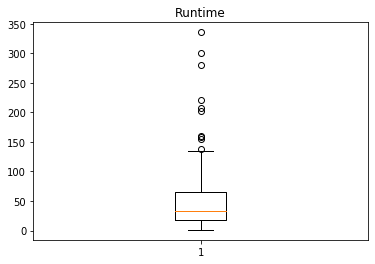

In [7]:
plt.boxplot(eval(dataLinear, labelsLinear, vanilla_kernel, gen_data_i, 100))
plt.title("Runtime")
plt.show()

#### Pick 1000 random points $[ \tau \cdot cos (\varphi), \tau \cdot sin (\varphi)]^{T}$ with $\tau \in [0.8, 1,2] \cup [1.6, 2.4]$ uniformly chosen and $\varphi \in [0, 2\pi]$ uniformly chosen and label $-1$ for $\tau \leq 1.2$ and label $+1$ for $\tau \geq 1.6$.

In [8]:
dataDonut, labelsDonut = gen_data_ii(1000)

# ---------------------------------------------------------------------

print("Initializing Perceptron algorithm, calculate kernel matrix ...")
p = Perceptron(dataDonut, gauss_kernel)
print("Done.\n", "Training perceptron ...", sep='\n')
p.train(labelsDonut)
print("Done.")
print("\nSteps until convergence:", p.steps)

Initializing Perceptron algorithm, calculate kernel matrix ...
Done.

Training perceptron ...
Done.

Steps until convergence: 16


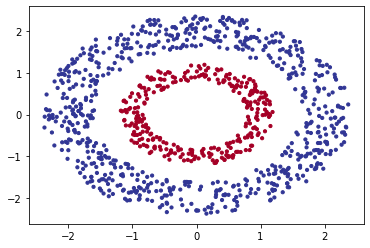

In [9]:
x = dataDonut[:, 0]
y = dataDonut[:, 1]

for l in p.predictions:
    clear_output(wait=True)
    plt.scatter(x, y, c=l, s=10, cmap="RdYlBu")
    plt.show()
    sleep(0.5)

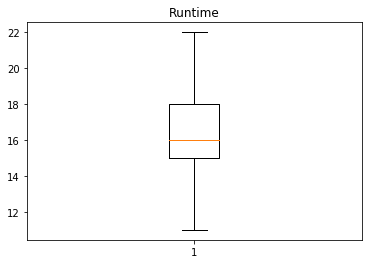

In [10]:
plt.boxplot(eval(dataDonut, labelsDonut, gauss_kernel, gen_data_ii, 100))
plt.title("Runtime")
plt.show()

#### Pick 1000 random points $[ 1+\tau \cdot cos (\varphi), 1+\tau \cdot sin (\varphi)]^{T}$ with $\tau \in [0.8, 1,2] \cup [1.6, 2.4]$ uniformly chosen and $\varphi \in [0, 2\pi]$ uniformly chosen and label $-1$ for $\tau \leq 1.2$ and label $+1$ for $\tau \geq 1.6$.

In [11]:
dataDonutOffset, labelsDonutOffset = gen_data_iii(1000)

# ---------------------------------------------------------------------

print("Initializing Perceptron algorithm, calculate kernel matrix ...")
p = Perceptron(dataDonutOffset, gauss_kernel)
print("Done.\n", "Training perceptron ...", sep='\n')
p.train(labelsDonutOffset)
print("Done.")
print("\nSteps until convergence:", p.steps)

Initializing Perceptron algorithm, calculate kernel matrix ...
Done.

Training perceptron ...
Done.

Steps until convergence: 20


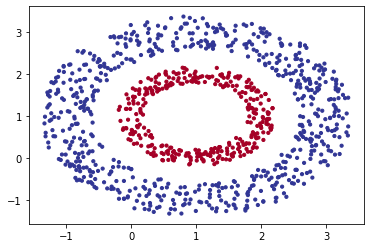

In [12]:
x = dataDonutOffset[:, 0]
y = dataDonutOffset[:, 1]

for l in p.predictions:
    clear_output(wait=True)
    plt.scatter(x, y, c=l, s=10, cmap="RdYlBu")
    plt.show()
    sleep(0.5)

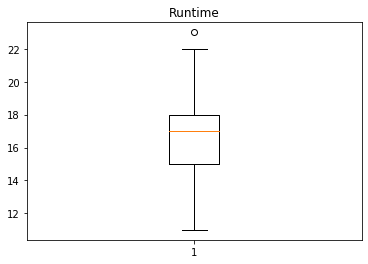

In [13]:
plt.boxplot(eval(dataDonutOffset, labelsDonutOffset, gauss_kernel, gen_data_iii, 100))
plt.title("Runtime")
plt.show()